In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr


# Create figures for this analysis.

Creating:
- Distribution plot of RPE
- Scatterplots comparing RPE to:
    - VO2max
    - FRIEND fitness percentile
    - Max HR
    - Percent of age-predicted max HR
    
Scatter plots include pearson correlations to assess the strength of the relationships.

In [2]:
with open('../data/cleaned_dataframe.pickle','rb') as read_file:
    df = pickle.load(read_file)

## Distribution of RPE (includes all tests).

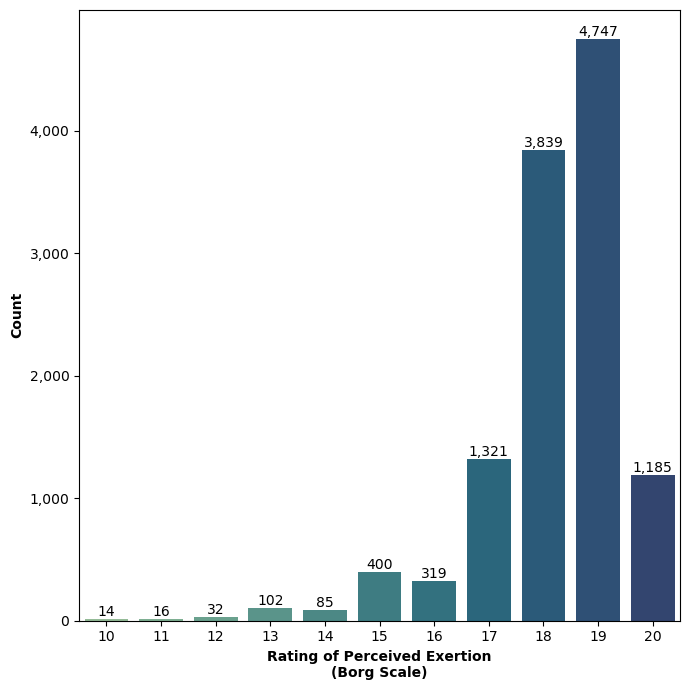

In [3]:
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(7,7))
# fig.suptitle("Distribution of RPE Values",weight='bold')

# Graph the distribution for the first test.
sns.countplot(x=df["peak_rpe"],
             data=df,
             palette="crest",
#              color='k'
             )
ax.set_ylabel('Count', weight="bold")
# Add commas for y-axis numbers.
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel('Rating of Perceived Exertion\n(Borg Scale)', weight="bold")
# Add bar labels (with commas for numbers).
container = ax.containers[0]
ax.bar_label(container, labels=[f'{p.get_height():,}' for p in container])

plt.tight_layout()
plt.show()

# plt.savefig('../images/rpe_dist.tif', facecolor='white', dpi=150)

## RPE vs. VO2max relationships.

In [4]:
corr, p = pearsonr(df["peak_rpe"], df["vo2_ml_kg_min"])
# print(f"Pearsons correlation: {corr:.2f}")
# print(f"Pearsons sig: {p:.3f}")

# corr, _ = spearmanr(df["peak_rpe"], df["vo2_ml_kg_min"])
# print('Spearmans correlation: %.3f' % corr)

sns.regplot(x=df["peak_rpe"], 
            y=df["vo2_ml_kg_min"], 
            ci=None,
            data=df,
            color = "C0",
            scatter_kws={'alpha':0.2}, 
            line_kws={"color": "0.2"})
plt.text(10, 70, f"r = {corr:.2f}", horizontalalignment='left', size='medium', color='black', weight='semibold')
p_val = "< 0.05" if p < 0.05 else f"{p:.2f}"
plt.text(10, 65, f"P {p_val}", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.ylabel('VO2max (ml/kg/min)')
plt.xlabel('RPE')
plt.xticks(list(range(10,21,1)))
plt.title('Distribution of VO2max Values\nAcross Different RPE Values', weight='bold')

# plt.show()

# plt.savefig('../images/rpe_vs_vo2.tif', facecolor='white', dpi=150)

Text(0.5, 1.0, 'Distribution of VO2max Values\nAcross Different RPE Values')

## RPE vs FRIEND percentiles.

In [5]:
corr, p = pearsonr(df["peak_rpe"], df["FRIEND_perc"])
# print(f"Pearsons correlation: {corr:.2f}")
# print(f"Pearsons sig: {p:.3f}")

# corr, _ = spearmanr(df["peak_rpe"], df["FRIEND_perc"])
# print('Spearmans correlation: %.3f' % corr)

sns.regplot(x=df["peak_rpe"], 
            y=df["FRIEND_perc"], 
            ci=None,
            data=df,
            color = "C2",
            scatter_kws={'alpha':0.2}, 
            line_kws={"color": "0.2"})
plt.text(10, 100, f"r = {corr:.2f}", horizontalalignment='left', size='medium', color='black', weight='semibold')
p_val = "< 0.05" if p < 0.05 else f"{p:.2f}"
plt.text(10, 95, f"P {p_val}", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.ylabel('FRIEND Percentile')
plt.xlabel('RPE')
plt.xticks(list(range(10,21,1)))
plt.title('Distribution of FRIEND Percentiles\nAcross Different RPE Values', weight='bold')

# plt.show()

# plt.savefig('../images/rpe_vs_perc.tif', facecolor='white', dpi=150)

Text(0.5, 1.0, 'Distribution of FRIEND Percentiles\nAcross Different RPE Values')

## Looking at HRmax.
Have to drop those tests missing max HR so creating a new dataset for that (max HR not required for the other analysis since it's not a variable of interest).

In [6]:
df_HR = df.dropna(subset=["max_hr"])


In [7]:
# Add in percent of age-predicted max HR (from Tanaka et al.).
def perc_max_hr(max_hr, age):
    return round((max_hr / (220 - age)) *100)

df_HR["perc_max_hr"] = df_HR.apply(lambda x: perc_max_hr(x.max_hr, x.ageattest), axis=1)

<ipython-input-7-fea0f623f4cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HR["perc_max_hr"] = df_HR.apply(lambda x: perc_max_hr(x.max_hr, x.ageattest), axis=1)


### Max HR.

In [8]:
corr, p = pearsonr(df_HR["peak_rpe"], df_HR["max_hr"])
# print(f"Pearsons correlation: {corr:.2f}")
# print(f"Pearsons sig: {p:.3f}")

# corr, _ = spearmanr(df["peak_rpe"], df["FRIEND_perc"])
# print('Spearmans correlation: %.3f' % corr)

sns.regplot(x=df_HR["peak_rpe"], 
            y=df_HR["max_hr"], 
            ci=None,
            data=df_HR,
            color = "C3",
            scatter_kws={'alpha':0.2}, 
            line_kws={"color": "0.2"})
plt.text(10, 230, f"r = {corr:.2f}", horizontalalignment='left', size='medium', color='black', weight='semibold')
p_val = "< 0.05" if p < 0.05 else f"{p:.2f}"
plt.text(10, 220, f"P {p_val}", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.ylabel('Max HR (bpm)')
plt.xlabel('RPE')
plt.xticks(list(range(10,21,1)))
plt.title('Distribution of Max HR Values\nAcross Different RPE Values', weight='bold')

# plt.show()

# plt.savefig('../images/rpe_vs_HR.tif', facecolor='white', dpi=150)

Text(0.5, 1.0, 'Distribution of Max HR Values\nAcross Different RPE Values')

### Percent age-predicted Max HR.

In [9]:
corr, p = pearsonr(df_HR["peak_rpe"], df_HR["perc_max_hr"])
# print(f"Pearsons correlation: {corr:.2f}")
# print(f"Pearsons sig: {p:.3f}")

# corr, _ = spearmanr(df["peak_rpe"], df["FRIEND_perc"])
# print('Spearmans correlation: %.3f' % corr)

sns.regplot(x=df_HR["peak_rpe"], 
            y=df_HR["perc_max_hr"], 
            ci=None,
            data=df_HR,
            color = "salmon",
            scatter_kws={'alpha':0.2}, 
            line_kws={"color": "0.2"})
plt.text(10, 155, f"r = {corr:.2f}", horizontalalignment='left', size='medium', color='black', weight='semibold')
p_val = "< 0.05" if p < 0.05 else f"= {p:.2f}"
plt.text(10, 145, f"P = {p_val}", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.ylabel('Percent of Age-Predicted Max HR')
plt.xlabel('RPE')
plt.xticks(list(range(10,21,1)))
plt.title('Distribution of Percent Age-Predicted Max HR Values\nAcross Different RPE Values', weight='bold')

# plt.show()

# plt.savefig('../images/rpe_vs_perc_HR.tif', facecolor='white', dpi=150)

Text(0.5, 1.0, 'Distribution of Percent Age-Predicted Max HR Values\nAcross Different RPE Values')

## Combined FRIEND CRF percentile and age-predicted max HR for publication.

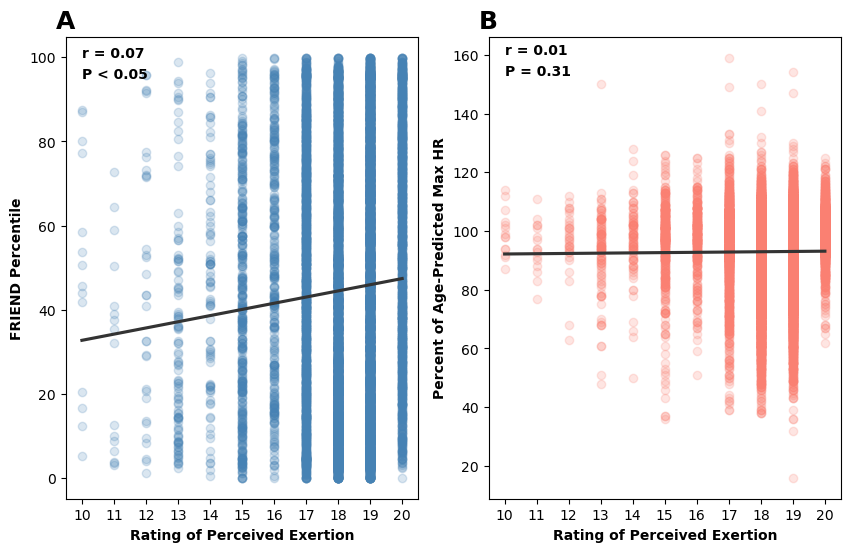

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

# Graph the FRIEND percentile first.
corr, p = pearsonr(df["peak_rpe"], df["FRIEND_perc"])

sns.regplot(ax=ax[0],
            x=df["peak_rpe"], 
            y=df["FRIEND_perc"], 
            ci=None,
            data=df,
            color = "steelblue",
            scatter_kws={'alpha':0.2}, 
            line_kws={"color": "0.2"})
ax[0].text(10, 100, f"r = {corr:.2f}", horizontalalignment='left', size='medium', color='black', weight='semibold')
p_val = "< 0.05" if p < 0.05 else f"{p:.2f}"
ax[0].text(10, 95, f"P {p_val}", horizontalalignment='left', size='medium', color='black', weight='semibold')

ax[0].set_ylabel('FRIEND Percentile', weight="bold")
ax[0].set_xlabel('Rating of Perceived Exertion', weight="bold")
ax[0].set(xticks=(list(range(10,21,1))))
ax[0].set_title('A', weight='bold', x=0, size=18)

# Then, graph the percent of age-predicted max HR.
corr, p = pearsonr(df_HR["peak_rpe"], df_HR["perc_max_hr"])

sns.regplot(ax=ax[1],
            x=df_HR["peak_rpe"], 
            y=df_HR["perc_max_hr"], 
            ci=None,
            data=df_HR,
            color = "salmon",
            scatter_kws={'alpha':0.2}, 
            line_kws={"color": "0.2"})
ax[1].text(10, 160, f"r = {corr:.2f}", horizontalalignment='left', size='medium', color='black', weight='semibold')
p_val = "< 0.05" if p < 0.05 else f"= {p:.2f}"
ax[1].text(10, 153, f"P {p_val}", horizontalalignment='left', size='medium', color='black', weight='semibold')

ax[1].set_ylabel('Percent of Age-Predicted Max HR', weight="bold")
ax[1].set_xlabel('Rating of Perceived Exertion', weight="bold")
ax[1].set(xticks=(list(range(10,21,1))))
ax[1].set_title('B', weight='bold', x=0, size=18)

plt.show()
# plt.savefig('../images/perc_HR_and_FRIEND_perc.tif', facecolor='white', dpi=150)

### Exploratory graphs
Looking at some other relationships of interest for questions that came up during analysis. These aren't of significant interest for the primary study aims.

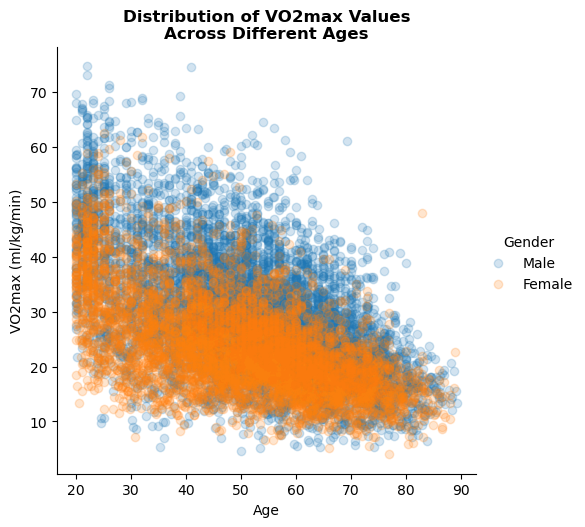

In [40]:
# Age vs VO2.

sns.lmplot(x="ageattest", 
            y="vo2_ml_kg_min", 
            ci=None,
            data=df,
            hue="Gender",
#             color = "C6",
            scatter_kws={'alpha':0.2},
            fit_reg=False)

plt.ylabel('VO2max (ml/kg/min)')
plt.xlabel('Age')
plt.title('Distribution of VO2max Values\nAcross Different Ages', weight='bold')

plt.show()

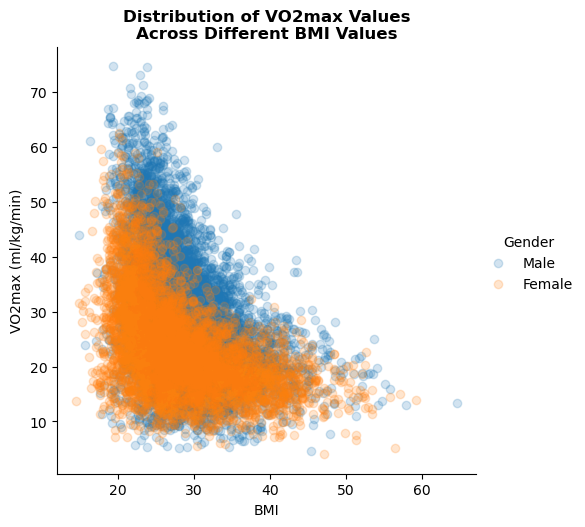

In [42]:
# BMI vs VO2.

sns.lmplot(x="BMI", 
            y="vo2_ml_kg_min", 
            ci=None,
            data=df,
            hue="Gender",
#             color = "C4",
            scatter_kws={'alpha':0.2}, 
            fit_reg=False)

plt.ylabel('VO2max (ml/kg/min)')
plt.xlabel('BMI')
plt.title('Distribution of VO2max Values\nAcross Different BMI Values', weight='bold')

plt.show()